True Negative: 200
True Positive: 500
False Negative: 0
False Positive: 300
0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: Label, Length: 1000, dtype: int32
0     -21.20
1     -19.62
2     -25.56
3     -22.36
4     -25.68
       ...  
995    -1.36
996    -2.72
997    -2.39
998    -4.68
999    -3.37
Name: z-score calculated from 7. 8. and 9., Length: 1000, dtype: float64


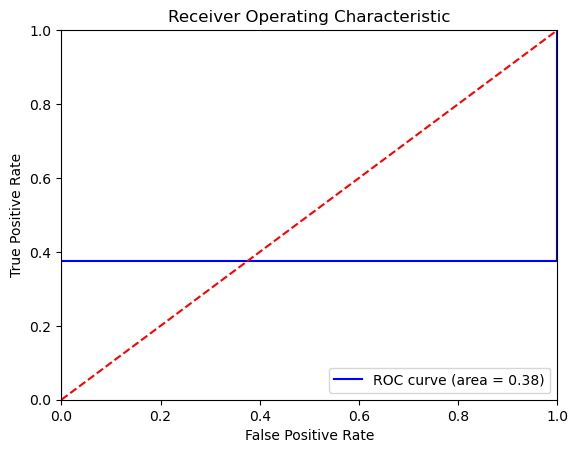

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
    
TN = []
TP = []
FN = []
FP = []
    
# Other Pc,
# df_sissi = "C:/bla/Waste/MA/2.Versuch/Data/SISSIz_Excel/sissi.xlsx"
# df_multiperm_mono = "C:/bla/Waste/MA/2.Versuch/Data/SISSIz_Excel/multiperm_mono.xlsx"

# Home Pc,
df_sissi = "D:/Masterarbeit_programmieren/2.Versuch/Data/SISSIz_Excel/sissi.xlsx"
df_multiperm_mono = "D:/Masterarbeit_programmieren/2.Versuch/Data/SISSIz_Excel/multiperm_mono.xlsx"

df1 = pd.read_excel(df_sissi, usecols=['z-score calculated from 7. 8. and 9.'])
df2 = pd.read_excel(df_multiperm_mono, usecols=['z-score calculated from 7. 8. and 9.'])
    
# create Labels,
df1["Label"] = np.where(df1['z-score calculated from 7. 8. and 9.'] < -4, 1, 0)
df2["Label"] = np.where(df2['z-score calculated from 7. 8. and 9.'] > -4, 1, 0)
# split data in four conditions,
TN.extend(df2.loc[df2['Label'] == 0, 'Label'].tolist())
TP.extend(df1.loc[df1['Label'] == 1, 'Label'].tolist())
FN.extend(df1.loc[df1['Label'] == 0, 'Label'].tolist())
FP.extend(df2.loc[df2['Label'] == 1, 'Label'].tolist())
    
print('True Negative:', len(TN))
print('True Positive:', len(TP))
print('False Negative:', len(FN))
print('False Positive:', len(FP))

df = pd.concat([df1, df2], ignore_index=True)

# Prediction value and scores,
y_true = df['Label']
y_scores = df['z-score calculated from 7. 8. and 9.']

print(y_true),
print(y_scores),

# Calculate ROC-Curve,
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC-Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
